In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [63]:
# reading data into a dataframe
df_fc = pd.read_csv(r'C:\Users\Administrator\Documents\Machine Learning\Files_CSV\FuelConsumption.csv')
df_fc.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [64]:
#select some features that we want to use for regression.
cdf = df_fc[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


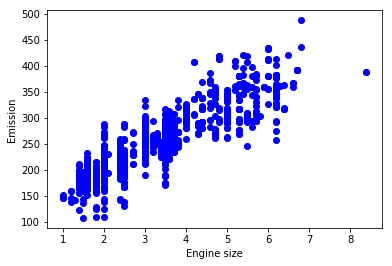

In [65]:
#plot Emission values with respect to Engine size:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

In [66]:
## split dataset into train and test sets, 80% of the entire data for training, and the 20% for testing.
# create a mask to select random rows using np.random.rand() function:
msk = np.random.rand(len(df_fc)) < 0.8
train = cdf[msk]
test = cdf[~msk]

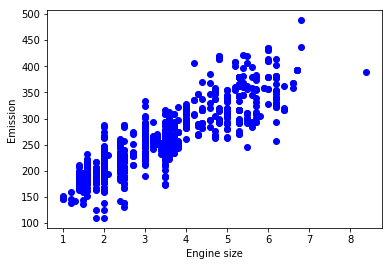

In [67]:
# Train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

In [68]:
# predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars.
# Multiple linear regression is the extension of simple linear regression model.
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x, y)

# the coefficients
print('Coefficients: ', regr.coef_)

Coefficients:  [[11.9314318   6.84095677  9.59432067]]


In [69]:
# I will use Scikit-learn that uses plain Ordinary Least Squares method to solve this problem
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
        % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 497.97
Variance score: 0.88


In [70]:
# Next I will replace 'FUELCONSUMPTION_COMB' with 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY'
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)

# the coefficients
print('Coefficients: ', regr.coef_)

Coefficients:  [[11.99172713  6.65059947  5.71204341  3.74711242]]


In [71]:
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print(print("Residual sum of squares: %.2f"
    % np.mean((y_hat - y) ** 2)))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 497.91
None
Variance score: 0.88


There is no difference in the result,by  replacing 'FUELCONSUMPTION_COMB' with 'FUELCONSUMPTION_CITY' and 'FUELCONSUMPTION_HWY'